In [1]:
import os
import struct
import numpy as np


def load_mnist(path, kind='train'):
    """Загружает данные МNIST из пути path"""
    labels_path = os.path.join(path, '%s-labels.idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images.idx3-ubyte' % kind)

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
    return images, labels

In [2]:
X_train, y_train = load_mnist('', kind='train')
print('Строк: %d, столбцов: %d' % (X_train.shape[0], X_train.shape[1]))
X_test, y_test = load_mnist('', kind='t10k')
print('Строк: %d, столбцов: %d' % (X_test.shape[0], X_test.shape[1]))

Строк: 60000, столбцов: 784
Строк: 10000, столбцов: 784


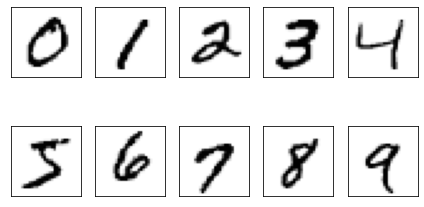

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

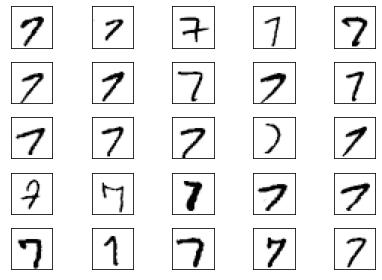

In [4]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [5]:
import numpy as np

np.savez_compressed('mnist_scaled',
                    X_traiп=X_train,
                    y_traiп=y_train,
                    X_test=X_test,
                    y_test=y_test)

In [6]:
mnist = np.load('mnist_scaled.npz')
mnist.files

['X_traiп', 'y_traiп', 'X_test', 'y_test']

In [7]:
X_train, y_train, X_test, y_test = [mnist[f] for f in mnist.files]

In [8]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = ((X / 255.) - .5) * 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=123, stratify=y)

In [9]:
from multilayerneuralnetwork.neuralnet import NeuralNetMLP

nn = NeuralNetMLP(n_hidden=100, l2=0.01, epochs=200, eta=0.0005, minibatch_size=100, shuffle=True, seed=1)
nn.fit(X_train=X_train[:55000], y_train=y_train[: 55000], X_valid=X_train[55000:], y_valid=y_train[55000:])

200/200 | Издержки: 5019.49 | Правильность при обучении/при проверке: 99.27%/97.34%%

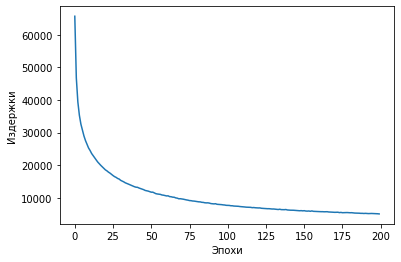

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Издержки')
plt.xlabel('Эпохи')
plt.show()

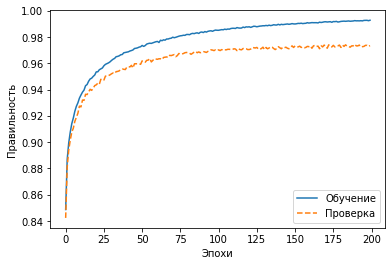

In [13]:
plt.plot(range(nn.epochs), nn.eval_['train_acc'], label='Обучение')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], label='Проверка', linestyle='--')
plt.ylabel('Правильность')
plt.xlabel('Эпохи')
plt.legend(loc='lower right')
plt.show()

In [14]:
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred).astype(np.float) / X_test.shape[0])
print('Правильность при испытании: %.2f%%' % (acc * 100))

Правильность при испытании: 97.22%


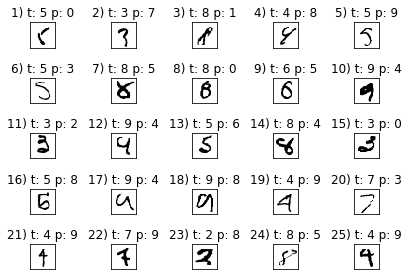

In [46]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, )
ax = ax.flatten()
for i in range(25):
    img = miscl_img.iloc[i].values.reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i + 1, correct_lab.iloc[i], miscl_lab[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()